<a href="https://colab.research.google.com/github/chi19961026/Credit-Card-Fraud-Analytics/blob/main/DQR_CreditCardTransactionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DQR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('default')


## Data Description
This dataset contains 97,851 real credit card transactions records in 2010 from a US government organization. It covers 10 fields, including 9 categorical fields and 1 numerical field.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2024 Fall/DSO562_Fraud Analytics/Project1. Credit Card Transaction Fraud/Project Material/card transactions.csv')

In [ ]:
data.head(20)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
5,6,5142149874,1/1/10,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0
6,7,5142189277,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
7,8,5142191182,1/1/10,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0
8,9,5142258629,1/1/10,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0
9,10,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             97852 non-null  int64  
 1   Cardnum            97852 non-null  int64  
 2   Date               97852 non-null  object 
 3   Merchnum           94455 non-null  object 
 4   Merch description  97852 non-null  object 
 5   Merch state        96649 non-null  object 
 6   Merch zip          93149 non-null  float64
 7   Transtype          97852 non-null  object 
 8   Amount             97852 non-null  float64
 9   Fraud              97852 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.5+ MB


## Numerical Fields

In [ ]:
data['Amount'].describe().round(2)

,Amount
count,97852.00
mean,425.47
std,9949.85
min,0.01
25%,33.38
50%,137.40
75%,425.82
max,3102045.53


In [ ]:
sum(data['Amount'].isnull())

0

In [ ]:
zero_count = (data['Amount'] == 0).sum()
zero_count

0

In [ ]:
data['Amount'].mode()

,Amount
0,3.62


## Categorical Fields

In [ ]:
data_categorical = data.drop('Amount', axis = 1)
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             97852 non-null  int64  
 1   Cardnum            97852 non-null  int64  
 2   Date               97852 non-null  object 
 3   Merchnum           94455 non-null  object 
 4   Merch description  97852 non-null  object 
 5   Merch state        96649 non-null  object 
 6   Merch zip          93149 non-null  float64
 7   Transtype          97852 non-null  object 
 8   Fraud              97852 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 6.7+ MB


In [ ]:
column_names_list = data_categorical.columns.tolist()
column_names_list

['Recnum',
 'Cardnum',
 'Date',
 'Merchnum',
 'Merch description',
 'Merch state',
 'Merch zip',
 'Transtype',
 'Fraud']

In [ ]:
# Function to count zeros in a column
def count_zeros(column):
    return (column == 0).sum()

statistics_of_data = []

for col in column_names_list:
    statistics_of_data.append((
        col,
        'categorical',
        data_categorical[col].notnull().sum(),
        data_categorical[col].isnull().sum(),
        f'{data_categorical[col].notnull().sum()/data.shape[0]*100:.1f}%',
        count_zeros(data_categorical[col]),
        data_categorical[col].nunique(),
        data_categorical[col].mode()[0]
    ))

# Create DataFrame
stats_dfcat = pd.DataFrame(statistics_of_data, columns=[
    'Field Name', 'Field Type', '# Records Have Values','Null Values', '% Populated', '# Zeros', '# Unique Values', 'Most Common'])

# Save to Excel
stats_dfcat.to_excel('categoricals_table.xlsx', index=False)

# Display DataFrame
stats_dfcat


,Field Name,Field Type,# Records Have Values,Null Values,% Populated,# Zeros,# Unique Values,Most Common
0,Recnum,categorical,97852,0,100.0%,0,97852,1
1,Cardnum,categorical,97852,0,100.0%,0,1645,5142148452
2,Date,categorical,97852,0,100.0%,0,365,2/28/10
3,Merchnum,categorical,94455,3397,96.5%,0,13091,930090121224
4,Merch description,categorical,97852,0,100.0%,0,13126,GSA-FSS-ADV
5,Merch state,categorical,96649,1203,98.8%,0,227,TN
6,Merch zip,categorical,93149,4703,95.2%,0,4567,38118.0
7,Transtype,categorical,97852,0,100.0%,0,4,P
8,Fraud,categorical,97852,0,100.0%,95805,2,0


## Fields Detail

### Cardnum

* The distribution shows that the highest frequency of transactions for a single card number is 1,192.

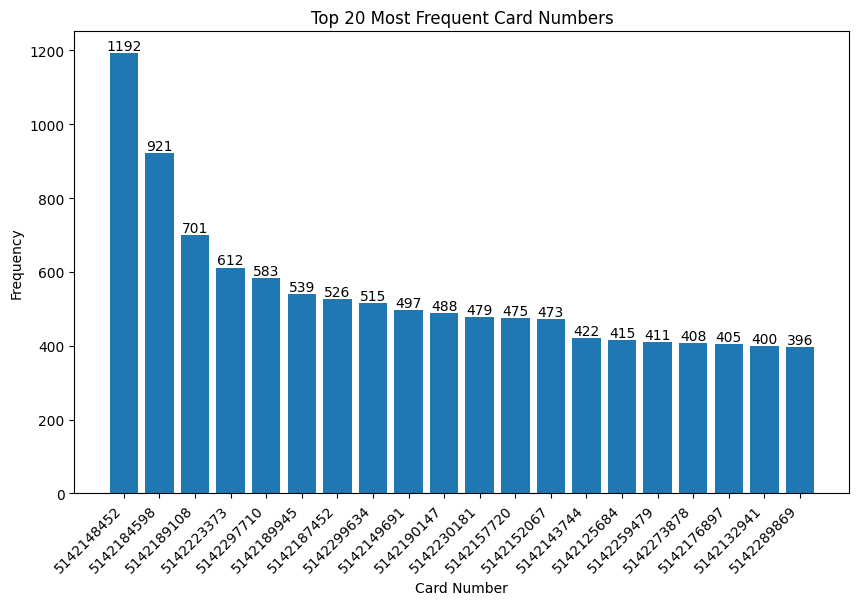

In [ ]:
# Convert Cardnum to string to treat as categorical
data["Cardnum"] = data["Cardnum"].astype(str)

# Get the counts of each category and select the top 20
cardnum_counts = data["Cardnum"].value_counts().nlargest(20)

# Plotting the bar chart with matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(cardnum_counts.index, cardnum_counts.values)

# Adding the frequency count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Top 20 Most Frequent Card Numbers')
plt.xlabel('Card Number')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Get the counts of each category and select the max and min frequency
cardnum_counts_max = data["Cardnum"].value_counts().nlargest(1)
cardnum_counts_min = data["Cardnum"].value_counts().nsmallest(1)

print('max:', cardnum_counts_max)
print('min:', cardnum_counts_min)

max: Cardnum
5142148452    1192
Name: count, dtype: int64
min: Cardnum
5142274861    1
Name: count, dtype: int64


*   The box plot indicates that the mean frequency of card numbers is 59.48.
*   The top 20 most frequent card numbers seem to be outliers.




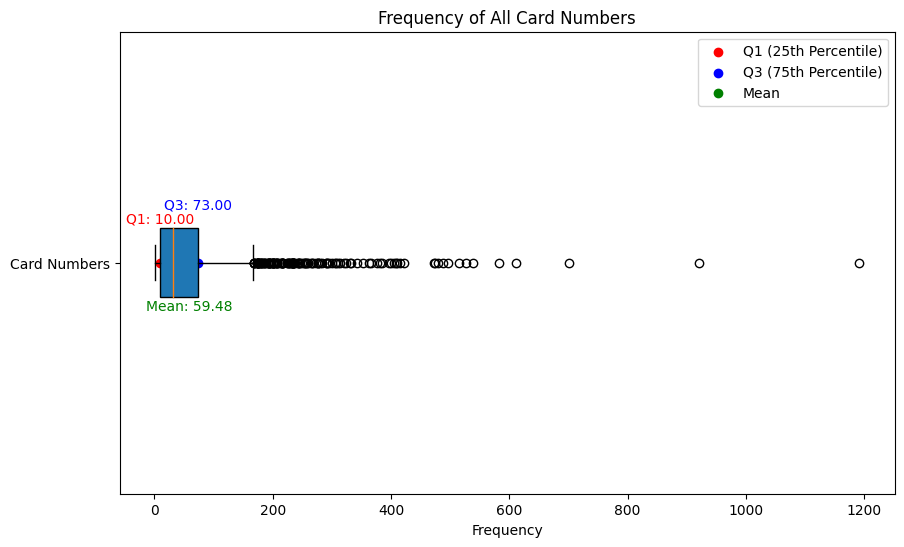

In [ ]:
# Get the counts of each Cardnum category
cardnum_counts = data["Cardnum"].value_counts()

# Calculate Q1, Q3, and mean
Q1 = cardnum_counts.quantile(0.25)
Q3 = cardnum_counts.quantile(0.75)
mean_value = cardnum_counts.mean()

# Plotting the box plot with matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(cardnum_counts.values, vert=False, patch_artist=True)

# Highlighting the Q1, Q3, and mean values
plt.scatter(Q1, 1, color='red', label='Q1 (25th Percentile)')
plt.scatter(Q3, 1, color='blue', label='Q3 (75th Percentile)')
plt.scatter(mean_value, 1, color='green', label='Mean')

# Adding labels for the highlighted points with adjusted positions
plt.text(Q1, 1.08, f'Q1: {Q1:.2f}', color='red', ha='center', va='bottom')
plt.text(Q3, 1.11, f'Q3: {Q3:.2f}', color='blue', ha='center', va='bottom')
plt.text(mean_value, 0.92, f'Mean: {mean_value:.2f}', color='green', ha='center', va='top')

plt.title('Frequency of All Card Numbers')
plt.xlabel('Frequency')
plt.yticks([1], ['Card Numbers'])  # Labeling y-axis with 'Card Numbers' since there's only one box
plt.legend(loc='upper right')
plt.show()


### Date

* From the monthly distribution, August and September had the highest transactions, while October and November had the lowest.

In [ ]:
# Ensure the 'Date' column is in datetime format, with only yyyy-mm-dd
data['Date'] = pd.to_datetime(data['Date']).dt.floor('D')

# Extract the month from the Date column
data['Month'] = data['Date'].dt.month

# Group the data by month and count the number of transactions
monthly_counts = data.groupby('Month').size()

# Display the resulting DataFrame
print(monthly_counts)


Month
1      6955
2      7796
3      9421
4      7796
5      9117
6      9313
7      8477
8     11178
9     10072
10     5138
11     5836
12     6753
dtype: int64


<ipython-input-213-122a4528e9f5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date']).dt.floor('D')


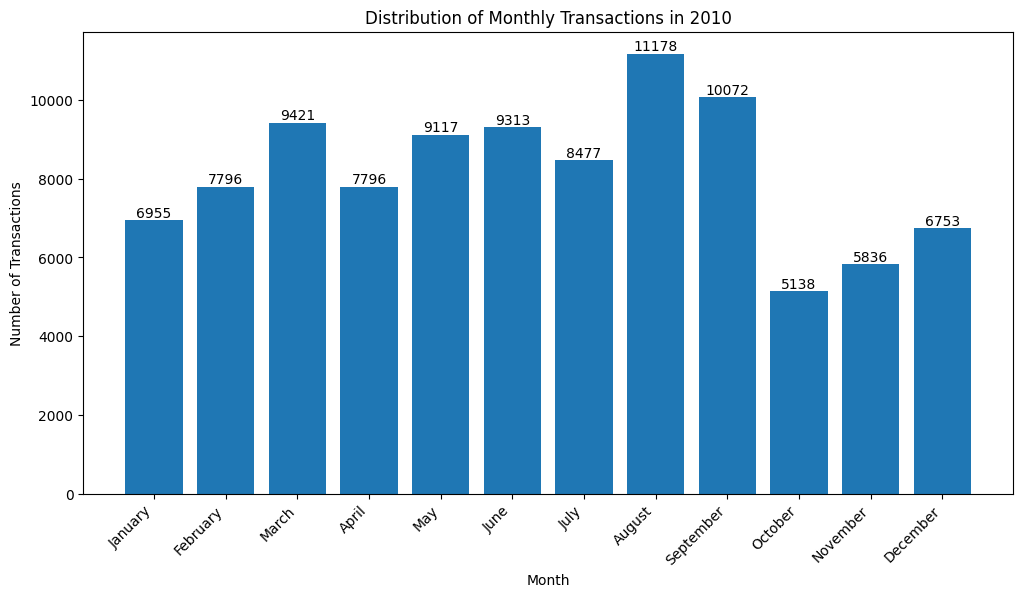

In [ ]:
# Extract the month name
data['Month'] = data['Date'].dt.month_name()

# Group by month name and count the transactions
monthly_counts = data.groupby('Month').size()

# Reindex to ensure the correct order of months (January, February, ..., December)
monthly_counts = monthly_counts.reindex(['January', 'February', 'March', 'April', 'May', 'June',
                                         'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting the monthly transaction counts with x ticks from Jan to Dec
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_counts.index, monthly_counts.values)

# Adding the frequency count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Distribution of Monthly Transactions in 2010')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
date_max = data['Date'].max()
date_min = data['Date'].min()

print(date_max)
print(date_min)

2010-12-31 00:00:00
2010-01-01 00:00:00


* The daily transaction line chart shows a periodic trend with clear ups and downs. The average number of transactions by weekday indicates that low transactions occurred from Thursday to Saturday. Therefore, we can infer that the periodic trend is related to weekday seasonality.

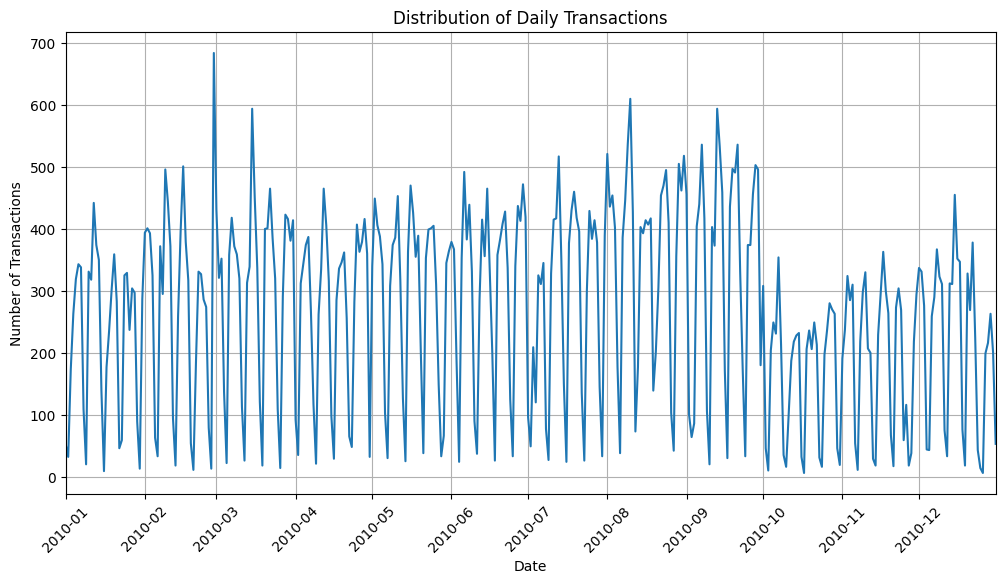

In [ ]:
# Group by date to get the count of transactions per date
date_counts = data['Date'].value_counts().sort_index()

# Plotting the daily distribution of the number of transactions
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values)
plt.title('Distribution of Daily Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')

# Set x-axis limits to ensure it ends on 2010-12-31
plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2010-12-31'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [ ]:
# Extract the weekday from the Date column (Monday=0, Sunday=6)
data['Weekday'] = data['Date'].dt.day_name()

# Group the data by weekdays and count the number of transactions
weekday_counts = data.groupby('Weekday').size()

# Reorder the weekday_counts to ensure the order is Monday to Sunday
weekday_counts = weekday_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Display the resulting Series
print(weekday_counts)

Weekday
Monday       18749
Tuesday      19914
Wednesday    18333
Thursday     10156
Friday        5133
Saturday     10398
Sunday       15169
dtype: int64


Text(0, 0.5, 'Number of Transactions')

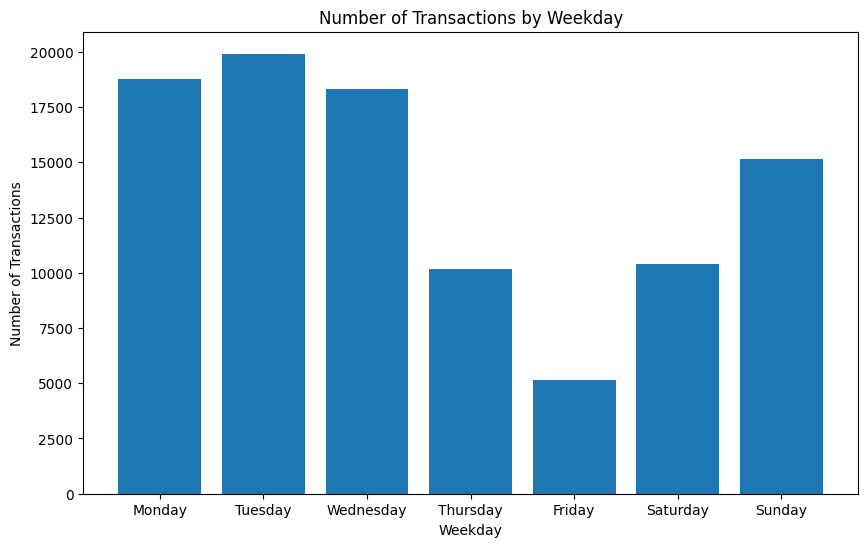

In [ ]:
# Plotting the bar chart with matplotlib
plt.figure(figsize=(10, 6))
plt.bar(weekday_counts.index, weekday_counts.values)

# Adding titles and labels
plt.title('Number of Transactions by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')

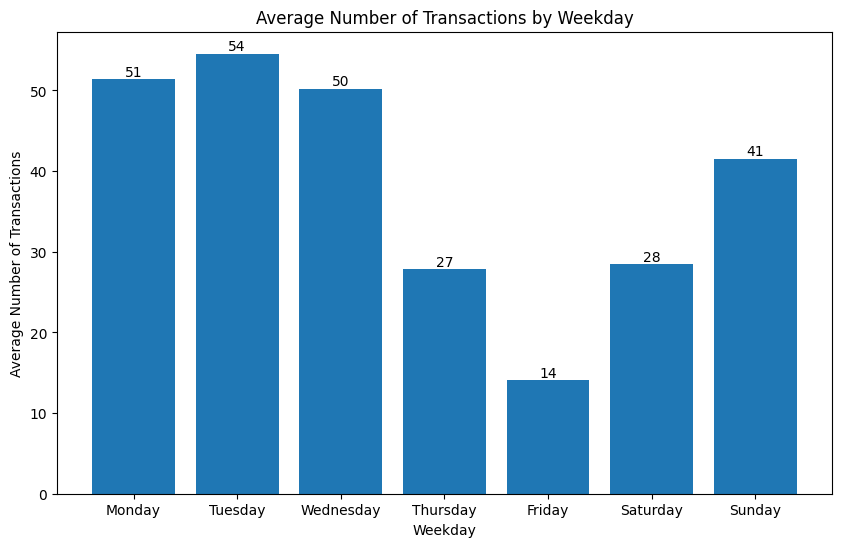

In [ ]:
# Group the data by weekdays and calculate the average number of transactions per weekday
weekday_avg = data.groupby('Weekday').size() / data['Date'].nunique()

# Reorder the weekday_avg to ensure the order is Monday to Sunday
weekday_avg = weekday_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the bar chart with matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(weekday_avg.index, weekday_avg.values)

# Adding the average number of transactions on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval)}', ha='center', va='bottom')

# Adding titles and labels
plt.title('Average Number of Transactions by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Number of Transactions')

# Displaying the bar chart
plt.show()


### Merchnum

* The distribution shows that the highest transaction frequency for a single merchant is 9,419. Additionally, the second highest bar indicates that 3,397 merchant numbers are missing (nan).


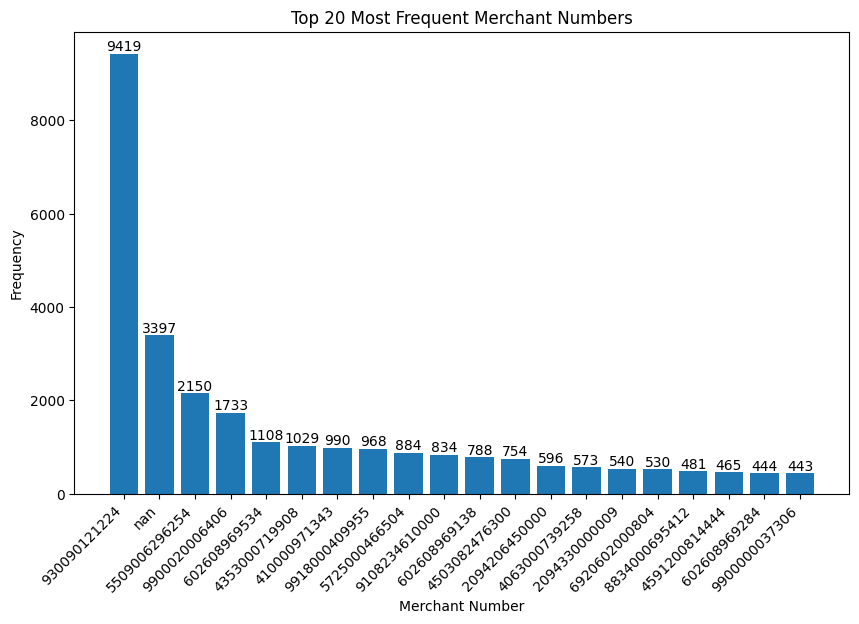

In [ ]:
# Convert Cardnum to string to treat as categorical
data["Merchnum"] = data["Merchnum"].astype(str)

# Get the counts of each category and select the top 20
merchnum_counts = data["Merchnum"].value_counts().nlargest(20)

# Plotting the bar chart with matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(merchnum_counts.index, merchnum_counts.values)

# Adding the frequency count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Top 20 Most Frequent Merchant Numbers')
plt.xlabel('Merchant Number')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

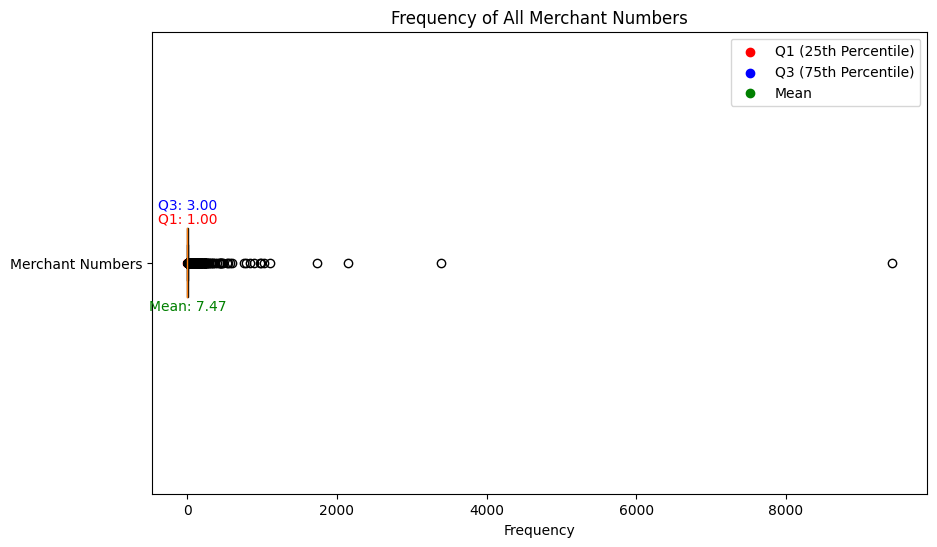

In [ ]:
# Get the counts of each Merchnum category
merchnum_counts = data["Merchnum"].value_counts()

# Calculate Q1, Q3, and mean
Q1 = merchnum_counts.quantile(0.25)
Q3 = merchnum_counts.quantile(0.75)
mean_value = merchnum_counts.mean()

# Plotting the box plot with matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(merchnum_counts.values, vert=False, patch_artist=True)

# Highlighting the Q1, Q3, and mean values
plt.scatter(Q1, 1, color='red', label='Q1 (25th Percentile)')
plt.scatter(Q3, 1, color='blue', label='Q3 (75th Percentile)')
plt.scatter(mean_value, 1, color='green', label='Mean')

# Adding labels for the highlighted points with adjusted positions
plt.text(Q1, 1.08, f'Q1: {Q1:.2f}', color='red', ha='center', va='bottom')
plt.text(Q3, 1.11, f'Q3: {Q3:.2f}', color='blue', ha='center', va='bottom')
plt.text(mean_value, 0.92, f'Mean: {mean_value:.2f}', color='green', ha='center', va='top')

plt.title('Frequency of All Merchant Numbers')
plt.xlabel('Frequency')
plt.yticks([1], ['Merchant Numbers'])  # Labeling y-axis with 'Merchant Numbers' since there's only one box
plt.legend(loc='upper right')
plt.show()



* The "Summary Statistics for Merchant Number Frequencies" table shows that the Q3 is 3.00, indicating that 75% of the merchant transaction frequencies were lower than three times.
The top 20 most frequent merchants seem to be outliers.

In [ ]:
# Calculate Q1, mean, Q3, standard deviation, max, and min
Q1 = round(merchnum_counts.quantile(0.25), 2)
mean_value = round(merchnum_counts.mean(), 2)
Q3 = round(merchnum_counts.quantile(0.75), 2)
std_dev = round(merchnum_counts.std(), 2)
max_value = round(merchnum_counts.max(), 2)
min_value = round(merchnum_counts.min(), 2)

# Create a DataFrame to display the results as a table
summary_table = pd.DataFrame({
    "Metric": ["Q1 (25th Percentile)", "Mean", "Q3 (75th Percentile)", "Standard Deviation", "Max", "Min"],
    "Value": [Q1, mean_value, Q3, std_dev, max_value, min_value]
})

# Print the table
print(summary_table)

                 Metric    Value
0  Q1 (25th Percentile)     1.00
1                  Mean     7.47
2  Q3 (75th Percentile)     3.00
3    Standard Deviation    96.10
4                   Max  9419.00
5                   Min     1.00


### Merch description, state & zip


#### **Merch description**
* Compared to the 'Top 20 Most Frequent Merchant Numbers' chart, the frequencies of the top 20 merchant descriptions are lower, indicating that there are different descriptions associated with the same merchant number.

#### **Merch state**
* TN (Tennessee) is the most frequent state for merchants.
There are 1,203 missing values in this field.

#### **Merch zip**
* 38118 is the most frequent zip code for merchants.
The data type of this field is currently ‘float’ and needs to be changed to string.
There are 4,703 missing values in this field.


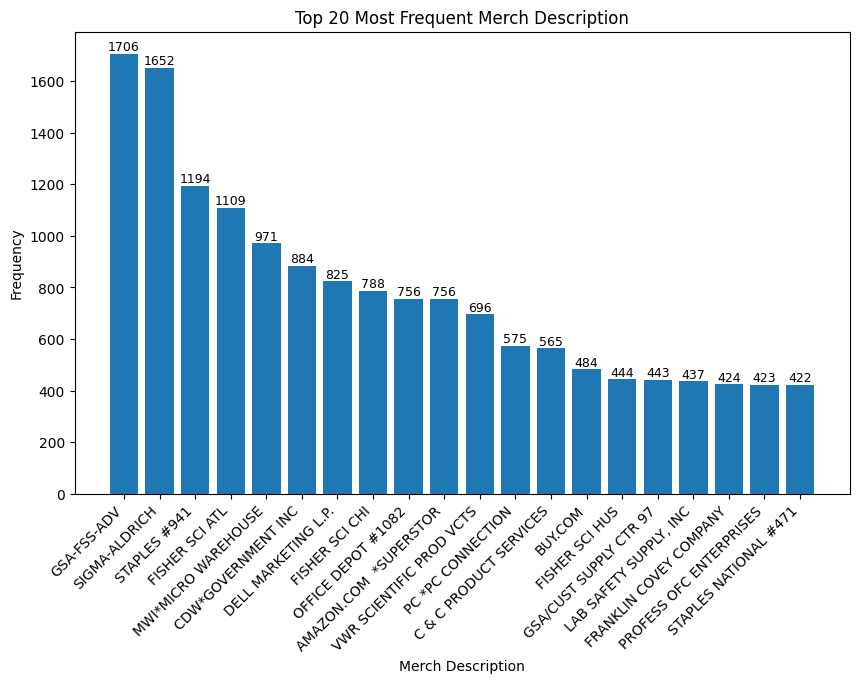

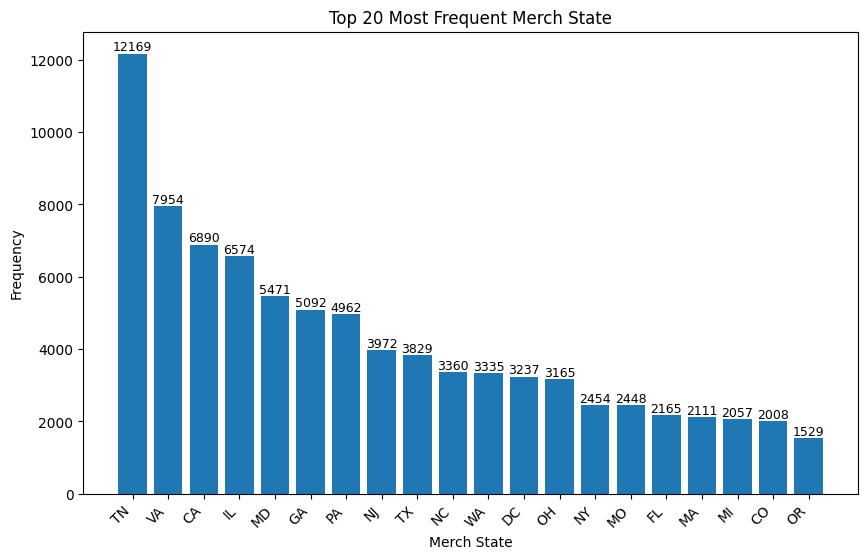

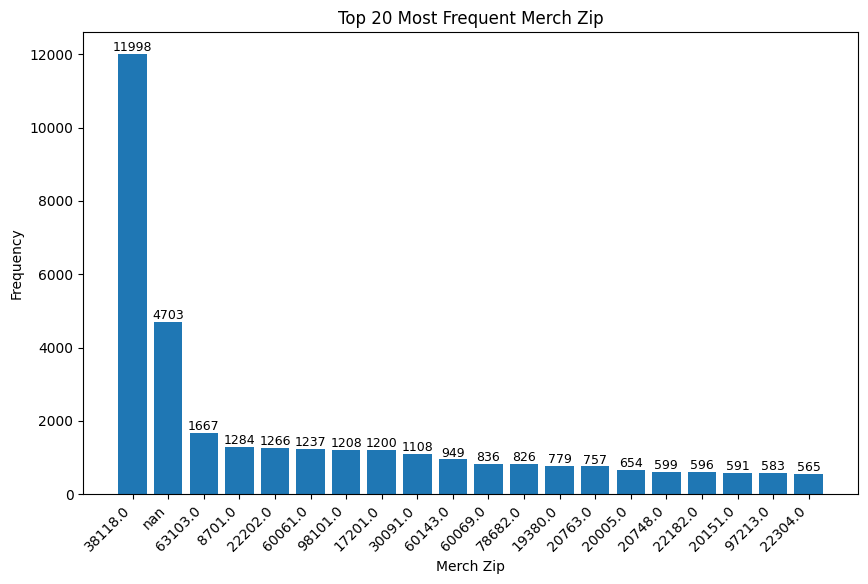

In [ ]:
# List of columns to plot
columns_to_plot = ['Merch description', 'Merch state', 'Merch zip']

# Loop through each column and plot the top 20 most frequent values
for column in columns_to_plot:
    # Convert the column to string to treat as categorical
    data[column] = data[column].astype(str)

    # Get the counts of each category and select the top 20
    counts = data[column].value_counts().nlargest(20)

    # Plotting the bar chart with matplotlib
    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index, counts.values)

    # Adding the frequency count on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=9)

    # Adding titles and labels
    plt.title(f'Top 20 Most Frequent {column.title()}')
    plt.xlabel(column.title())
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Displaying the bar chart
    plt.show()


In [ ]:
columns_to_analyze = ['Merch description', 'Merch state', 'Merch zip']

# Initialize an empty DataFrame to store the results
summary_table = pd.DataFrame()

# Loop through each column and calculate the summary statistics
for column in columns_to_analyze:
    # Convert the column to string to treat as categorical
    data[column] = data[column].astype(str)

    # Get the counts of each category
    counts = data[column].value_counts()

    # Calculate Q1, mean, Q3, standard deviation, max, and min
    Q1 = round(counts.quantile(0.25), 2)
    mean_value = round(counts.mean(), 2)
    Q3 = round(counts.quantile(0.75), 2)
    std_dev = round(counts.std(), 2)
    max_value = round(counts.max(), 2)
    min_value = round(counts.min(), 2)

    # Store the results in the summary_table DataFrame
    summary_table[column.title()] = [Q1, mean_value, Q3, std_dev, max_value, min_value]

# Add the Metric column to the summary_table
summary_table.insert(0, 'Metric', ["Q1 (25th Percentile)", "Mean", "Q3 (75th Percentile)", "Standard Deviation", "Max", "Min"])

# Print the final summary table
print(summary_table)

                 Metric  Merch Description  Merch State  Merch Zip
0  Q1 (25th Percentile)               1.00         1.00       1.00
1                  Mean               7.45       429.18      21.42
2  Q3 (75th Percentile)               4.00         4.25      10.00
3    Standard Deviation              38.83      1415.93     203.43
4                   Max            1706.00     12169.00   11998.00
5                   Min               1.00         1.00       1.00


### Transtype

* 99.6% of the card transaction types are Purchase Transaction, meaning the card is used to buy goods and services.

In [ ]:
transtype_counts = data["Transtype"].value_counts()
print(transtype_counts)

Transtype
P    97497
A      181
D      173
Y        1
Name: count, dtype: int64


### Amount

* The transaction amounts show a significant right skew, indicating that most transactions are of lower amounts, but some are quite large.
* 75% of the amounts fall under $425.82, but the standard deviation is $9,949.85, indicating the presence of outliers.

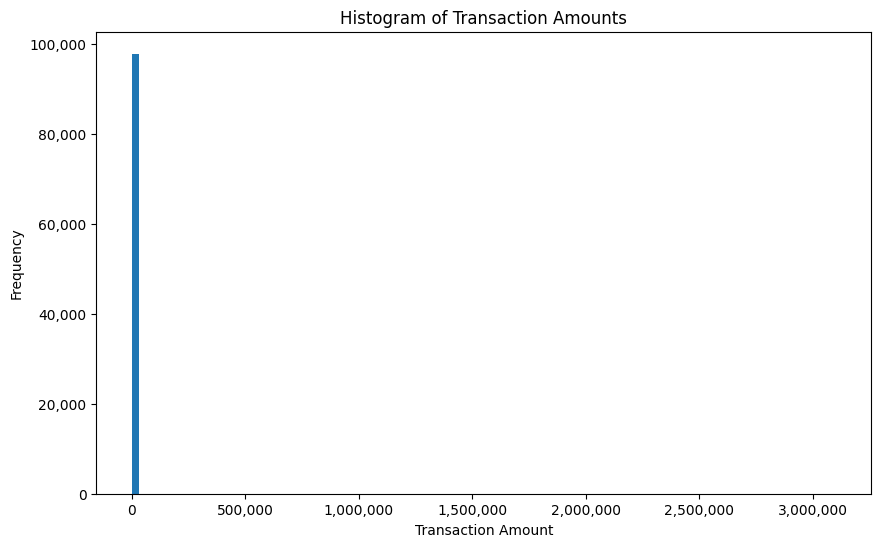

In [ ]:
# Plotting the histogram with matplotlib and custom x and y axis formatting
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(data['Amount'], bins=100,)

# Adding titles and labels
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Customizing the x-axis to show large numbers without scientific notation
plt.xticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000],
           ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000'])

# Customizing the y-axis to include commas for thousands separators
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Displaying the histogram
plt.show()

In [ ]:
round(data['Amount'].describe(),2)

,Amount
count,97852.00
mean,425.47
std,9949.85
min,0.01
25%,33.38
50%,137.40
75%,425.82
max,3102045.53


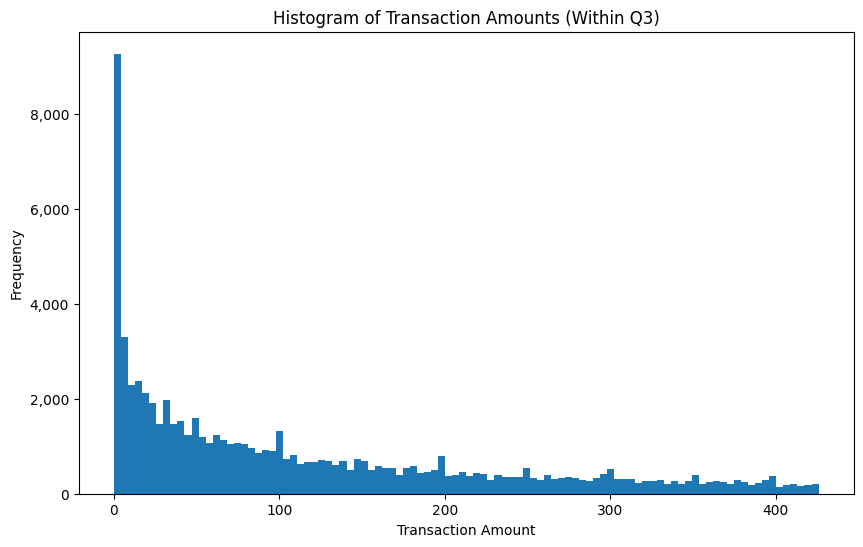

In [ ]:

# Calculate Q1 and Q3 for the Amount column
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)

# Filter the data to include only values within Q3
filtered_amounts = data['Amount'][ (data['Amount'] <= Q3)]

# Plotting the histogram for the filtered data within Q3
plt.figure(figsize=(10, 6))
plt.hist(filtered_amounts, bins=100)

# Adding titles and labels
plt.title('Histogram of Transaction Amounts (Within Q3)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Customizing the y-axis to include commas for thousands separators
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Displaying the histogram
plt.show()


### Fraud

* The dataset contains 97.9% non-fraud records and 2.1% fraud records.

In [ ]:
fraud_counts = data["Fraud"].value_counts()
print(fraud_counts)

Fraud
0    95805
1     2047
Name: count, dtype: int64


## DQR Conclusion & Next Steps
The overall data quality still needs improvement through data cleaning, including handling missing values, adjusting data types, and dealing with outliers. Client input is also needed to apply business sense in evaluating whether the statistical summaries for each field are reasonable.